In [1]:
import os

cwd = os.getcwd()

In [2]:
import pandas as pd


df = pd.read_csv(cwd + '/data/processed/posts_train_test_clean.csv')

In [3]:
df.head()

,Unnamed: 0,Post Link,Title,Body,Tags,CreationDate,Answer Date,AcceptedAnswerId,id,score,complete_text,normalized_text
0,69943,16835963,Sidekiq not processing queue,"<p>What possible reasons can <a href=""https://...",<ruby-on-rails-3><redis><sidekiq>,2013-05-30 12:19:00,2013-05-30 12:53:32,16836794,16836794,71,sidekiq not processing queue what possible rea...,sidekiq process queue possibl reason sidekiq p...
1,79655,31667160,Running docker container : iptables: No chain/...,<p>I'm trying to run a container but I get the...,<docker><port><iptables>,2015-07-28 04:03:53,2015-07-28 04:14:04,31667244,31667244,65,running docker container iptables no chain tar...,run docker contain iptabl chain target match n...
2,97858,3299648,Python Compilation/Interpretation Process,<p>I'm trying to understand the python compile...,<python><compiler-construction><interpreter><p...,2010-07-21 13:21:47,2010-07-21 13:28:54,3299724,3299724,53,python compilation interpretation process i m ...,python compil interpret process tri understand...
3,14078,3664272,Is std::vector so much slower than plain arrays?,<p>I've always thought it's the general wisdom...,<c++><arrays><performance><stl><vector>,2010-09-08 02:38:41,2010-09-08 02:57:40,3664349,3664349,239,is std vector so much slower than plain arrays...,std vector much slower plain array alway thoug...
4,46299,13342123,How to get relative path of a file in visual s...,<p>I am trying to get the path of an image fil...,<c#><visual-studio>,2012-11-12 10:33:32,2013-10-11 10:57:06,19316470,19316470,100,how to get relative path of a file in visual s...,get rel path file visual studio tri get path i...


### Criando os targets

In [4]:
def split_tags(tags):
    tags = tags[1:-1]
    tags = tags.split("><")
    
    return tags

In [5]:
df['targets'] = df.Tags.apply(lambda x: split_tags(x))

In [6]:
X, y = df['complete_text'], df['targets'].apply(lambda x: x[0])

In [7]:
y

0        ruby-on-rails-3
1                 docker
2                 python
3                    c++
4                     c#
              ...       
73917         javascript
73918     android-studio
73919               html
73920         javascript
73921               http
Name: targets, Length: 73922, dtype: object

In [8]:
all_targets = df.targets.apply(lambda x: x[0]).tolist()

In [9]:
from itertools import chain


targets_set = list()

# for targets in all_targets:
#     for target in targets:
#         targets_set.append(target)
        
for targets in all_targets:
    targets_set.append(targets)

In [10]:
targets_set = set(targets_set)

In [11]:
len(targets_set)

1460

In [12]:
targets_set

{'gpu',
 'memory-leaks',
 'filtering',
 'mutex',
 'jpa',
 'basic-authentication',
 'gcc',
 'domain-driven-design',
 'npm-install',
 'jira',
 'xhtml',
 'frameworks',
 'flex-lexer',
 'opencv',
 'delegates',
 'iis-7.5',
 'java-7',
 'archive',
 'entity-framework-core',
 'delphi',
 'context-free-grammar',
 'remote-desktop',
 'typing',
 'git-commit',
 'inputstream',
 'maps',
 'devise',
 'graph',
 'powerpivot',
 'virtualization',
 'dart',
 'ssl-certificate',
 'haproxy',
 'web-scraping',
 'actionscript-3',
 '2d',
 'plot',
 'sqlite',
 'google-app-engine',
 'mount',
 'for-loop',
 'grep',
 'set',
 'google-plus-one',
 'arduino',
 'reference',
 'asp-classic',
 'signals',
 'deprecated',
 'maven-3',
 'ios4',
 'windows',
 'postback',
 'clang',
 'get',
 'suppress-warnings',
 'e-commerce',
 'nexus',
 'django-models',
 'mobile-safari',
 'data-driven',
 'timezone',
 'glsl',
 'serial-port',
 'jsonschema',
 'hook',
 'google-cloud-storage',
 'swift2',
 'visual-studio-extensions',
 'dao',
 'liquid',
 'sitemap

In [13]:
words_post = df.complete_text.apply(lambda x: str(x))

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=20)
# vectorizer = TfidfVectorizer()
vectorizer.fit(words_post)
vector = vectorizer.transform(words_post)

In [14]:
len(vectorizer.vocabulary_)

8714

In [15]:
import gc

gc.collect()

0

In [16]:
from sklearn.model_selection import train_test_split
    
X_train, X_test, y_train, y_test = train_test_split(vector, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=44, n_jobs = -1)
lr_model.fit(X_train, y_train)

LogisticRegression(n_jobs=-1, random_state=44)

In [18]:
y_pred = lr_model.predict(X_test)

In [19]:
gc.collect()

45

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 0  0  0 ...  0  0  0]
 [ 0 13  0 ...  0  0  0]
 [ 0  1  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


C:\Users\Vitor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vitor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                             precision    recall  f1-score   support

                  .htaccess       0.00      0.00      0.00         1
                       .net       0.54      0.10      0.17       127
                   .net-3.5       0.00      0.00      0.00         1
                   .net-4.0       0.00      0.00      0.00         2
           active-directory       0.00      0.00      0.00         2
               afnetworking       0.00      0.00      0.00         1
                       agda       0.00      0.00      0.00         1
                    airflow       0.00      0.00      0.00         4
                       ajax       0.00      0.00      0.00         4
                        ajp       0.00      0.00      0.00         1
                  algorithm       0.61      0.43      0.51        51
            amazon-dynamodb       0.00      0.00      0.00         2
                 amazon-ec2       0.00      0.00      0.00         3
                  amazon-s3      

C:\Users\Vitor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
cm = confusion_matrix(y_test,y_pred)

ValueError: The number of FixedLocator locations (694), usually from a call to set_ticks, does not match the number of ticklabels (2).

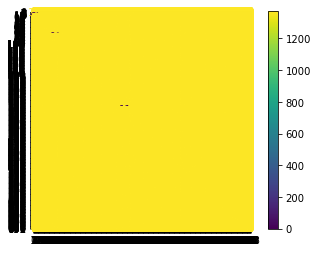

In [22]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics 

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True]) 
#cm_display.plot()
plt.show() 

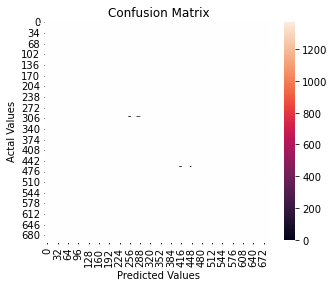

In [23]:
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


In [ ]:
# import pickle
# s = pickle.dumps(rf_model)
# rf_model_2 = pickle.loads(s)

In [24]:
from joblib import dump, load
dump(lr_model, 'models/lr_model.joblib') 

['models/lr_model.joblib']

In [ ]:
# from sklearn.model_selection import cross_val_score
# import numpy as np

# np.mean(cross_val_score(lr_model, X_train, y_train, cv=5))

In [ ]:
gc.collect()

#TODO Analisar modelo gerado